# Visualize Sentinel-2 Bands
Sample a random valid pixel from the clipped mosaic and visualize band values.

- Default raster: `data/processed/mosaic_s2_oct_2016_clipped.tif` (resolved from project root).
- Bands follow the download pipeline (B2, B3, B4, B5, B6, B7, B8, B8A).


In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.windows import Window

default_rel = Path('data/processed/mosaic_s2_oct_2016_clipped.tif')
project_root = Path.cwd()
if project_root.name == 'notebooks':
    project_root = project_root.parent
candidate = project_root / default_rel
if candidate.exists():
    raster_path = candidate
else:
    matches = list(project_root.rglob(default_rel.name))
    if not matches:
        raise FileNotFoundError(f'Could not locate {default_rel} from project root {project_root}')
    raster_path = matches[0]

print(f'Using raster: {raster_path}')
print(f'Current working dir: {Path.cwd()}')


Using raster: f:\brahmanbariavegetation\data\processed\mosaic_s2_oct_2016_clipped.tif
Current working dir: f:\brahmanbariavegetation\notebooks


In [2]:
def sample_random_valid_pixel(src, attempts=1000):
    for _ in range(attempts):
        row = np.random.randint(0, src.height)
        col = np.random.randint(0, src.width)
        mask = src.read_masks(1, window=Window(col, row, 1, 1))
        if mask[0, 0] == 0:
            continue  # nodata pixel
        values = src.read(src.indexes, window=Window(col, row, 1, 1))[:, 0, 0]
        x, y = src.transform * (col + 0.5, row + 0.5)
        return (row, col), (x, y), values
    raise ValueError('No valid pixel found after multiple attempts; check your raster/mask.')

with rasterio.Env(GDAL_TIFF_INTERNAL_MASK=False, GDAL_PAM_ENABLED=False):
    with rasterio.open(raster_path) as src:
        (row, col), (x, y), values = sample_random_valid_pixel(src)
        band_labels = list(src.descriptions) if src.descriptions and any(src.descriptions) else ['B2','B3','B4','B5','B6','B7','B8','B8A'][: len(src.indexes)]

print(f'Random valid pixel at row={row}, col={col}, coords=({x:.5f}, {y:.5f})')
print('Band values:')
for label, val in zip(band_labels, values):
    print(f'  {label}: {val}')


Random valid pixel at row=3076, col=3813, coords=(91.06397, 23.99162)
Band values:
  B2: 1211.99091812318
  B3: 1098.5794155914336
  B4: 822.5254525742688
  B5: 1084.5100946982427
  B6: 2113.9776507713823
  B7: 2566.7701906968905
  B8: 2383.41437994048
  B8A: 2780.6306477539188


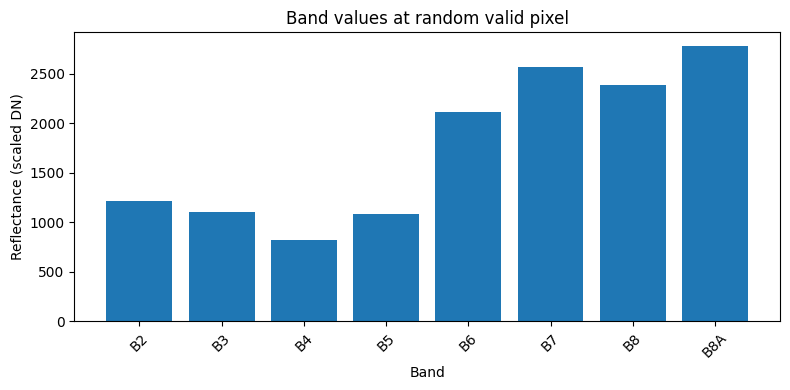

In [3]:
plt.figure(figsize=(8, 4))
plt.bar(range(len(values)), values, tick_label=band_labels)
plt.title('Band values at random valid pixel')
plt.ylabel('Reflectance (scaled DN)')
plt.xlabel('Band')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import rasterio
p = raster_path
with rasterio.open(p) as src:
    print("descriptions:", src.descriptions)
    for i in range(src.count):
        arr = src.read(i+1, masked=True)
        print(i+1, "min", float(arr.min()), "max", float(arr.max()))

descriptions: (None, None, None, None, None, None, None, None)
1 min 1089.2152433477656 max 1364.5617019439592
2 min 975.4139396211162 max 1271.7024101810503
3 min 714.257437470837 max 1003.7955582796658
4 min 977.2780215413965 max 1273.0885028487814
5 min 2044.0883622822132 max 2208.9125995221425
6 min 2485.4791507152 max 2616.1521101480544
7 min 2314.421502454649 max 2413.1005902571205
8 min 2703.0943185733095 max 2817.810826924864


: 